In [17]:
import  pyide
import importlib
importlib.reload(pyide)
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Direct input 
plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          #'font.family' : 'lmodern',
          #'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

4

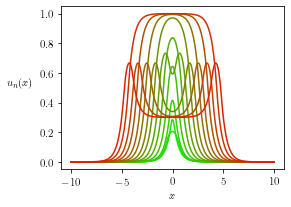

In [18]:
filename ='fig_accelerating_wave' #without extension
fig_size_x=4
fig_size_y=3

from imp import reload # for debugging
alpha=0.2
beta=0.8
mu=0.3

H = lambda x : np.heaviside(x, 1)

g = lambda x : H(x-alpha) - (1-mu)*H(x-beta)

import matplotlib.pyplot as plt

U = np.arange(0, 1, 0.01)
k = lambda x: 1/2 * np.exp(-np.abs(x))

model = pyide.IDEModel(growthFunction=pyide.GrowthFunction(g),
                  dispersalKernel=pyide.DisperalKernel(k))
                  
                
sim = pyide.IDESimulation(model)
sim.setDomain(xmin=-10, xmax=10, dx=0.005)
r=0.58
sim.setInitialCondition(lambda x : H(x+r)-H(x-r))
sim.setBoundaryCondition('static')

n = 15
sim.run(n)


times = np.arange(1, n)
X = sim.domain
U_seq = sim.timeSeries
T = len(U_seq)

fig,axs = plt.subplots()

for t in times:
    U = U_seq[t]
    axs.plot(X, U, color=(t/T,1-t/T,0))
    
axs.set_xlabel('$x$')
axs.set_ylabel('$u_n(x)$', rotation=0, labelpad=20)




fig.set_size_inches(fig_size_x,fig_size_y)
dpi = 1000
plt.savefig(filename+'.pdf', 
            #This is simple recomendation for publication plots
            dpi=dpi, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

n = dpi * fig_size_x
os.system('convert -resize '+str(n)+' '+filename+'.pdf '+filename+'.png')

4

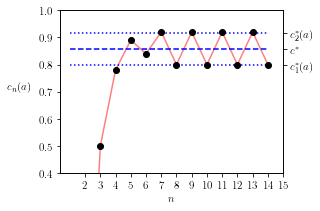

In [36]:
filename ='fig_accelerating_wave2' #without extension
fig_size_x=4
fig_size_y=3

predictedcstar = 0.8568
predictedc1 = 2*0.8568 + np.log(2/5)
predictedc2 = -np.log(2/5)
level=alpha

X = sim.domain
U_seq = sim.timeSeries
T = len(U_seq)

if len(times)==0:
    times = np.arange(T)

fig,axs = plt.subplots()

d0 = sim.step_size*np.sum(U_seq[0]>level)
C = []
for t in times[1:]:

    U = U_seq[t]
    d1 = sim.step_size*np.sum(U>level)
    C.append((d1-d0))
    d0 = d1

axs.plot(times[1:], C, color='red', alpha=0.5)
#axs.plot(times[1:], C, 'o', color='blue')
axs.set_xlabel('$n$')
axs.set_ylabel('$c_n(a)$', rotation=0, labelpad=20)

plt.plot([1, max(times)], [predictedcstar, predictedcstar], 'b--')
plt.plot([1, max(times)], [predictedc1, predictedc1], 'b:')
plt.plot([1, max(times)], [predictedc2, predictedc2], 'b:')

ax2 = axs.twinx() 

axs.set_ylim(.4, 1)
ax2.set_ylim(.4, 1)

#color = 'tab:green'
#ax2.set_ylabel('Y2-axis', color = color) 
ax2.plot(times[1:], C, 'o', color='black')
#ax2.tick_params(axis ='y', labelcolor = color) 
ax2.set_xticks(2+np.arange(0, len(times), 1))
ax2.set_yticks([predictedc1,predictedcstar,predictedc2])
ax2.set_yticklabels(['$c_1^*(a)$','$c^*$','$c_2^*(a)$'])


fig.set_size_inches(fig_size_x,fig_size_y)
dpi = 1000
plt.savefig(filename+'.pdf', 
            #This is simple recomendation for publication plots
            dpi=dpi, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

n = dpi * fig_size_x
os.system('convert -resize '+str(n)+' '+filename+'.pdf '+filename+'.png')